In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt

In [2]:
# upload
print('Uploading...')
exp_matrix = pd.read_csv('/root/work/data/survival/brca_exp_surv', index_col=0)
label = pd.read_csv('/root/work/data/survival/brca_label_surv', index_col=0)
print('Uploading done!')

Uploading...
Uploading done!


In [3]:
# data preprocessing
x = exp_matrix.T

# str -> int
y = np.array(label['survival_label'].map({'LTS':0, 'STS':1}).astype(int)).reshape(label.shape[0],1)


In [4]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(train)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [5]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=np.random.seed())
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(571, 12411) (246, 12411) (571, 1) (246, 1)


In [6]:
model = Sequential()
# model.add(Dense(1024, input_dim=train_x.shape[1], kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
# model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8192, input_dim=train_x.shape[1], kernel_initializer='he_normal', activation='LeakyReLU'))
model.add(Dropout(0.2))
model.add(Dense(4096, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

model.compile(loss=kr.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

Epoch 1/15
17/17 [==============================] - 7s 327ms/step - loss: 31.8716 - accuracy: 0.9181 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
17/17 [==============================] - 5s 315ms/step - loss: 12.4483 - accuracy: 0.9747 - val_loss: 63.7454 - val_accuracy: 0.0000e+00
Epoch 3/15
17/17 [==============================] - 6s 333ms/step - loss: 12.6751 - accuracy: 0.8577 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
17/17 [==============================] - 6s 338ms/step - loss: 4.6860 - accuracy: 0.9825 - val_loss: 2.2146e-26 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 6s 331ms/step - loss: 0.9825 - accuracy: 0.9630 - val_loss: 7.9759e-14 - val_accuracy: 1.0000
Epoch 6/15
17/17 [==============================] - 5s 316ms/step - loss: 0.3512 - accuracy: 0.9805 - val_loss: 1.5823e-12 - val_accuracy: 1.0000
Epoch 7/15
17/17 [==============================] - 5s 306ms/step - loss: 0.1882 - accuracy: 0.9805 - val_loss: 1.5796e-

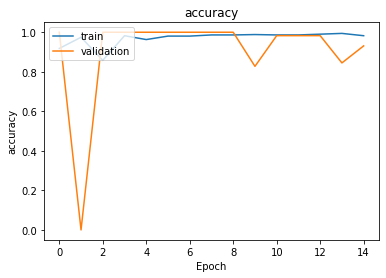

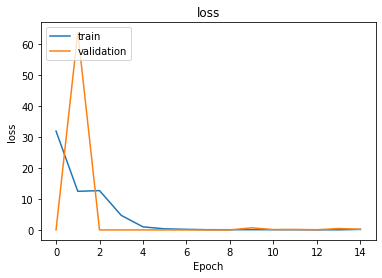

8/8 [==============================] - 0s 56ms/step - loss: 0.7321 - accuracy: 0.8862
test loss:  0.7320542931556702
test accuracy:  0.8861788511276245


In [7]:
b = 32
train_history=model.fit(train_x,
                        train_y,
                        epochs=15,
                        validation_split=0.1,
                        batch_size=b)

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

loss, accuracy = model.evaluate(test_x, test_y)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

In [5]:
from keras.models import load_model

# # 保存训练好的model为hdf5文件
# model.save('/root/work/model/brca_surv_model.h5')  
# 重新加载模型
model = load_model('/root/work/model/brca_surv_model.h5')

In [8]:
loss, accuracy = model.evaluate(test_x, test_y)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

8/8 [==============================] - 0s 25ms/step - loss: 0.1267 - accuracy: 0.9919
test loss:  0.12665529549121857
test accuracy:  0.9918699264526367


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = test_y
y_pred = model.predict(test_x).astype(np.int64)
cm = confusion_matrix(y_true,y_pred)
cm = pd.DataFrame(cm, columns=['LTS','STS'], index=['LTS','STS'])
cm

,LTS,STS
LTS,241,0
STS,4,1


In [13]:
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(formatter={"float": "{: 0.2f}".format})
cm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


,LTS,STS
LTS,1.0,0.0
STS,0.8,0.2


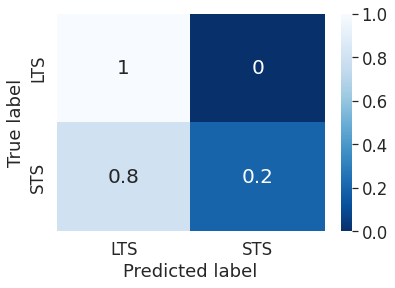

In [14]:
sns.set(font_scale=1.5)
plt.rc('font',size=20)
sns.heatmap(cm,cmap="Blues_r",annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [9]:
from sklearn.metrics import roc_curve
# y_pred = model.predict(test_x).ravel()
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred)
y_pred = model.predict(x).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

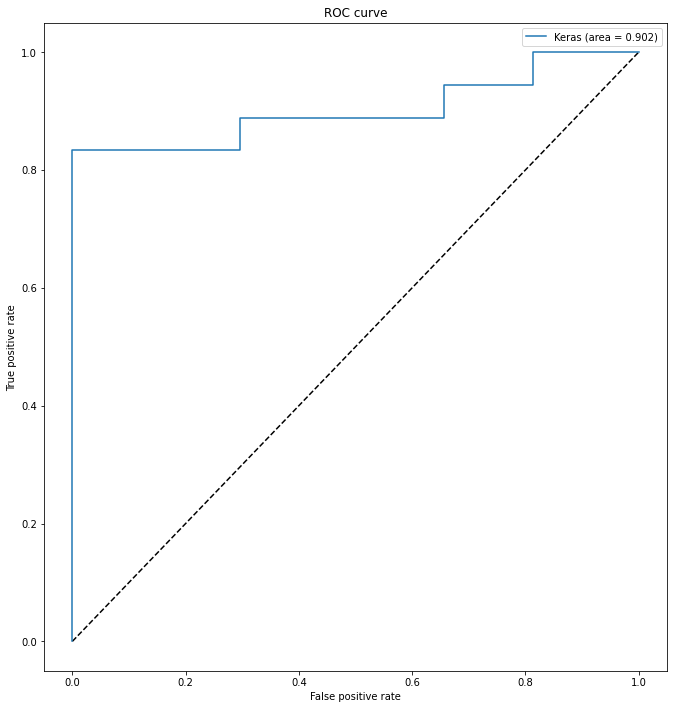

In [10]:
lw = 5
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.095, bottom=0.08, right=0.96, top=0.98)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

my = []
rf = []
dt = []
svm = []
lr = []
knn = []
nb = []

for i in range(10):
    # my
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=np.random.seed())
    print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
    loss, accuracy = model.evaluate(test_x, test_y)
    my.append(accuracy)

    clf=RandomForestClassifier()  
    clf = clf.fit(train_x,train_y)
    score1 = clf.score(test_x,test_y)
    rf.append(score1)

    clf2 = tree.DecisionTreeClassifier()
    clf2 = clf2.fit(train_x, train_y)
    score2 = clf2.score(test_x,test_y)
    dt.append(score2)

    clf3 = SVC(kernel='linear')
    clf3.fit(train_x,train_y)
    y_pred = clf3.predict(test_x)
    score3 = metrics.accuracy_score(test_y, y_pred)
    svm.append(score3)

    clf4 = linear_model.LogisticRegression(C=1e5)
    clf4.fit(train_x,train_y)
    score4 = clf4.score(test_x,test_y)
    lr.append(score4)

    clf5 = KNeighborsClassifier()
    clf5.fit(train_x,train_y)
    y_pred = clf5.predict(test_x)
    score5 = metrics.accuracy_score(test_y, y_pred)
    knn.append(score5)

    clf6 = GaussianNB()
    clf6 = clf6.fit(train_x,train_y)
    y_pred = clf6.predict(test_x)
    score6 = metrics.accuracy_score(test_y, y_pred)
    nb.append(score6)

evaluate_result = pd.DataFrame([my,rf,dt,svm,lr,knn,nb], index=['my','rf','dt','svm','lr','knn','nb'])
evaluate_result

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 0s 25ms/step - loss: 0.0792 - accuracy: 0.9959


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 1s 26ms/step - loss: 0.0776 - accuracy: 0.9959


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 1s 24ms/step - loss: 4.4538e-04 - accuracy: 1.0000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 1s 24ms/step - loss: 0.0789 - accuracy: 0.9959


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 0s 23ms/step - loss: 0.1949 - accuracy: 0.9878


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 1s 23ms/step - loss: 1.2083e-04 - accuracy: 1.0000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 0s 23ms/step - loss: 0.1170 - accuracy: 0.9919


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 0s 22ms/step - loss: 0.1945 - accuracy: 0.9878


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 1s 22ms/step - loss: 0.0504 - accuracy: 0.9959


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

(571, 12411) (246, 12411) (571, 1) (246, 1)
8/8 [==============================] - 0s 22ms/step - loss: 1.1635e-04 - accuracy: 1.0000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/loca

,0,1,2,3,4,5,6,7,8,9
my,0.995935,0.995935,1.000000,0.995935,0.987805,1.000000,0.991870,0.987805,0.995935,1.000000
rf,0.987805,0.987805,0.987805,0.979675,0.963415,0.987805,0.979675,0.975610,0.983740,0.983740
dt,0.971545,0.963415,0.975610,0.947154,0.934959,0.951220,0.955285,0.930894,0.959350,0.951220
svm,0.983740,0.987805,0.987805,0.975610,0.963415,0.987805,0.979675,0.975610,0.983740,0.983740
lr,0.979675,0.987805,0.987805,0.979675,0.963415,0.987805,0.979675,0.975610,0.983740,0.979675
knn,0.987805,0.987805,0.987805,0.979675,0.963415,0.987805,0.979675,0.975610,0.983740,0.983740
nb,0.918699,0.882114,0.922764,0.914634,0.947154,0.882114,0.869919,0.922764,0.918699,0.869919


In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=1)  #n_estimators表示弱学习器的最大迭代次数，或者说最大的弱学习器的个数。如果设置值太小，模型容易欠拟合；如果太大，计算量会较大，并且超过一定的数量后，模型提升很小
clf = clf.fit(train_x,train_y)
score1 = clf.score(test_x,test_y)
print('Random Forest Classifier result:', score1)

Random Forest Classifier result: 0.9349593495934959


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [29]:
# Desicion Tree
from sklearn import tree

clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(train_x, train_y)
score2 = clf2.score(test_x,test_y)
print('Decision Tree Classifier result:', score2)

Decision Tree Classifier result: 0.943089430894309


In [30]:
# SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

clf3 = SVC(kernel='rbf', decision_function_shape='ovo')
clf3.fit(train_x,train_y)
y_pred = clf3.predict(test_x)
print(metrics.classification_report(test_y, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       241
           1       0.00      0.00      0.00         5

    accuracy                           0.98       246
   macro avg       0.49      0.50      0.49       246
weighted avg       0.96      0.98      0.97       246



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# Logistic Regression
from sklearn import linear_model

clf4 = linear_model.LogisticRegression(C=1e5)
clf4.fit(train_x,train_y)

score4 = clf4.score(test_x,test_y)
print('Logistic Regression result:', score4)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Logistic Regression result: 0.983739837398374


In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

clf5 = KNeighborsClassifier(n_neighbors=3)
clf5.fit(train_x,train_y)
y_pred = clf5.predict(test_x)
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       241
           1       0.00      0.00      0.00         5

    accuracy                           0.98       246
   macro avg       0.49      0.50      0.49       246
weighted avg       0.96      0.98      0.97       246



/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and

In [32]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf6 = GaussianNB()
clf6 = clf6.fit(train_x,train_y)
y_pred = clf6.predict(test_x)
print(metrics.classification_report(test_y, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.99      0.89      0.94       241
           1       0.07      0.40      0.12         5

    accuracy                           0.88       246
   macro avg       0.53      0.65      0.53       246
weighted avg       0.97      0.88      0.92       246



In [17]:
import tensorflow as tf
def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    images = tf.cast(img_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        top_class = preds[:, top_pred_idx]

    grads = tape.gradient(top_class, images)
    return grads


def get_integrated_gradients(img_input, top_pred_idx, baseline=None, num_steps=50):
    """Computes Integrated Gradients for a predicted label.

    Args:
        img_input (ndarray): Original image
        top_pred_idx: Predicted label for the input image
        baseline (ndarray): The baseline image to start with for interpolation
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.

    Returns:
        Integrated gradients w.r.t input image
    """
    # If baseline is not provided, start with a black image
    # having same size as the input image.
    if baseline is None:
        baseline = np.zeros(img_size).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # # 2. Preprocess the interpolated images
    # interpolated_image = xception.preprocess_input(interpolated_image)

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * avg_grads
    return integrated_grads


def random_baseline_integrated_gradients(
    img_input, top_pred_idx, num_steps=50, num_runs=2
):
    """Generates a number of random baseline images.

    Args:
        img_input (ndarray): 3D image
        top_pred_idx: Predicted label for the input image
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.
        num_runs: number of baseline images to generate

    Returns:
        Averaged integrated gradients for `num_runs` baseline images
    """
    # 1. List to keep track of Integrated Gradients (IG) for all the images
    integrated_grads = []

    # 2. Get the integrated gradients for all the baselines
    for run in range(num_runs):
        baseline = np.random.random(img_size) * 255
        igrads = get_integrated_gradients(
            img_input=img_input,
            top_pred_idx=top_pred_idx,
            baseline=baseline,
            num_steps=num_steps,
        )
        integrated_grads.append(igrads)

    # 3. Return the average integrated gradients for the image
    integrated_grads = tf.convert_to_tensor(integrated_grads)
    return tf.reduce_mean(integrated_grads, axis=0)

In [ ]:
x = np.array(test_x.iloc[0])
img_size = x.shape
top_k = int(len(x)/100)

for num in range(len(test_x)):
    print(num)
    s = np.array(test_x.iloc[num]).reshape(1,test_x.shape[1])
    x = np.array(test_x.iloc[num])
    preds = model.predict(s)

    top_pred_idx = tf.argmax(preds[0])
    igrads = random_baseline_integrated_gradients(np.copy(x), top_pred_idx=top_pred_idx, num_steps=50, num_runs=2)
    igrads = np.array(igrads).reshape(1,test_x.shape[1])

    if num == 0:
        igs = igrads
    else:
        igs = np.concatenate((igs, igrads), axis=0)
preds = model.predict(test_x)
preds_y = pd.DataFrame(np.where(preds>0.5, 1, 0), columns=['class'])

idx_0 = preds_y.index[preds_y['class']==0].to_list()
idx_1 = preds_y.index[preds_y['class']==1].to_list()

igs = pd.DataFrame(igs, columns=test_x.columns)

surv_0 = igs.loc[idx_0]
surv_1 = igs.loc[idx_1]
# LTS
row_mean = pd.DataFrame(surv_0.mean(axis=0), columns=['mean']).sort_values('mean', inplace=False)
row_mean.to_csv('/root/work/multi/brca_surv0_igs_mean')

# STS
row_mean = pd.DataFrame(surv_1.mean(axis=0), columns=['mean']).sort_values('mean', inplace=False)
row_mean.to_csv('/root/work/multi/brca_surv1_igs_mean')